# 
<font face="华文行楷" size=10 >劳伦兹方程 (Lorentz Equation)</font> 
### >`翟家辉 19720212203881`

---------------------
________________________
<font size=6><div align='center'> **------------------------目录------------------------**</div></font>


## &#x2705; 壹 · Lorentz系统与奇怪吸引子简介
 
## &#x2705; 贰 · Lorentz系统状态演化与相图

## &#x2705; 叁 · 初始条件对系统状态的影响

## &#x274C; 肆 · 最大李雅普诺夫指数随r的变化

## &#x274C; 伍 · odeint算法调节

## &#x274C; 陆 · 问题与错误

## &#x274C; 柒 · 致谢

---------
--------
# 壹 · Lorentz系统与奇怪吸引子简介

### > *`Lorentz系统`*
>劳伦兹方程(Lorenz equation)是描述空气流体运动的一个简化微分方程组。1963年，美国气象学家劳伦兹(Lorenz,E. N.)将描述大气热对流的非线性偏微分方程组通过傅里叶展开，大胆地截断而导 出描述垂直速度、上下温差的展开系数x(t),y(t),z(t)的三维自治动力系统：

$$f(x) = \left\{\begin{array}{ll}
\frac{dx}{dt}=\sigma(y-x)\\
\frac{dy}{dt}=rx-y-xz\\
\frac{dz}{dt}=xy-bz\end{array}
\right.$$

>其中，在a=10，b=8/3，c=28时呈现混沌态。该系统的一个简单物理实现是流体在下方加热上方冷却的热对流管中的环流，此时，x1是流体速度，x2和x3分别为水平和垂直的温度差，$\sigma$为普朗特数，r为瑞利数，b是一个和空间有关的常数。他发现当r不断增加时，系统就由定常态(表示空气静止)分岔出周期态(表示对流状态)，最后，当r>24.74时，又分岔出非周期的混沌态(表示湍流)。由于劳伦兹是世界上第一个从确定的方程中发现了非周期的混沌现象，所以将上述方程一般称为劳伦兹方程。劳伦兹的工作结果最初在1963年发表，论文题目为Deterministic Nonperiodic Flow，发表在Journal of the Atmospheric Sciences杂志上。如今，这一方程组已成为混沌理论的经典，也是“巴西蝴蝶扇动翅膀在美国引起德克萨斯的飓风”一说的肇始。

### > *`奇怪吸引子`*
>奇怪吸引子是混沌学的重要组成理论，用于演化过程的终极状态，具有如下特征：终极性、稳定性、吸引性。吸引子是一个数学概念，描写运动的收敛类型。它是指这样的一个集合，当时间趋于无穷大时，在任何一个有界集上出发的非定常流的所有轨道都趋于它，这样的集合有很复杂的几何结构。由于奇怪吸引子与混沌现象密不可分，深入了解吸引子集合的性质，可以揭示出混沌的规律。

>它是一种特殊类的吸引子，其吸引区中相点运动均向该吸引子逼近，而吸引子内部相点运动是非周期的并具以下基本特征：
1、该系统局部具正的李亚普诺夫指数，从而其相点至少在相当靠近之后又以指数速度分离。
2、足够长时间后任意两相点可以任意靠近。
3、该吸引子集合具分数维结构。

---------
--------
# 贰 · Lorentz系统状态演化与相图
>### 以(10,10,10)，r=28为例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets

#LORENZ方程积分
def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])

In [89]:
#不动点求解器（导数为0）
import sympy
x=sympy.Symbol('x')
y=sympy.Symbol('y')
z=sympy.Symbol('z')
s=sympy.Symbol('s')
r=sympy.Symbol('r')
b=sympy.Symbol('b')
f1=s*(y-x)
f2=r*x-y-x*z
f3=x*y-b*z
h=sympy.solve([f1,f2,f3],[x,y,z])
print(h)
print("or",f'{sympy.latex(h)}')

[(0, 0, 0), (-sqrt(b*r - b), -sqrt(b*(r - 1)), r - 1), (sqrt(b*r - b), sqrt(b*(r - 1)), r - 1)]
or \left[ \left( 0, \  0, \  0\right), \  \left( - \sqrt{b r - b}, \  - \sqrt{b \left(r - 1\right)}, \  r - 1\right), \  \left( \sqrt{b r - b}, \  \sqrt{b \left(r - 1\right)}, \  r - 1\right)\right]


### 计算得不动点：$$\left( 0,  0,  0\right) \\  \left( - \sqrt{b r - b},  - \sqrt{b \left(r - 1\right)},   r - 1\right) \\  \left( \sqrt{b r - b}, \ \sqrt{b \left(r - 1\right)},   r - 1\right)$$

## > *`状态演化图与不动点`*

In [73]:

def main1(x,y,z,t,r):
    x0=np.array([x,y,z])
    t=np.linspace(0,t,10000)
    s=10
    b=8/3
    xt=odeint(lorenz,x0,t,args=(s,r,b))
    xt=xt.T
    fig = plt.figure(figsize=(20, 16))
    ax=plt.axes(projection='3d')
    
    #注释部分为其他3d调用方式
    #ax=fig.add_subplot(111,projection='3d')
    #ax.set_figure((5,5))
    #plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,15))
    
    #状态演化图
    ax.plot(xt[0],xt[1],xt[2],marker=".",markersize=1,linewidth=0.1,color="blueviolet")
    #不动点
    ax.plot(0,0,0,"x",c="black",markersize=5,label="(0,0,0)")
    ax.plot(-np.sqrt(b*r-b),-np.sqrt(b*r-b),r-1,"h",c="b",markersize=12,label='$(-\sqrt{br-b},-\sqrt{br-b},r-1)$')
    ax.plot(np.sqrt(b*r-b),np.sqrt(b*r-b),r-1,"h",c="r",markersize=12,label='$(\sqrt{br-b},\sqrt{br-b},r-1)$')
    #图例与坐标轴
    ax.set_ylabel('Y',size=15)
    ax.set_xlabel('X',size=15)
    ax.set_zlabel('Z',size=15)
    plt.legend(loc="best")
    plt.title(f"Lorenz equation-({x},{y},{z}),r={r}",size=15)
    plt.show()
    
#交互控件
widgets.interact_manual(
    main1,
    t=widgets.FloatSlider(min=0, max=500, step=0.01, value=100, readout_format='.2f',description='t:'),
    x=widgets.FloatSlider(min=-100, max=100, step=0.001, value=10, readout_format='.3f',description='X_0'),
    y=widgets.FloatSlider(min=-100, max=100, step=0.001, value=10, readout_format='.3f',description='Y_0:'),
    z=widgets.FloatSlider(min=-100, max=100, step=0.001, value=10, readout_format='.3f',description='Z_0;'),
    r=widgets.FloatSlider(min=0, max=1000, step=0.001, value=28, readout_format='.3f',description='R;')
)

interactive(children=(FloatSlider(value=10.0, description='X_0', min=-100.0, readout_format='.3f', step=0.001)…

<function __main__.main1(x, y, z, t, r)>

## > *`XYZ的时间变化`*

In [90]:
#XYZ的时间变化
def main2(x,y,z,t,r):
    x0=np.array([x,y,z])
    t=np.linspace(0,t,10000)
    s=10
    b=8/3
    xt=odeint(lorenz,x0,t,args=(s,r,b))
    xt=xt.T
    plt.figure(figsize=(15,10))
    plt.plot(t,xt[0],color='b',label='x',alpha=0.5)
    plt.plot(t,xt[1],color='g',label='y',alpha=0.5)   
    plt.plot(t,xt[2],color='r',label='z',alpha=0.5)
    plt.plot(t,-t+t+np.sqrt(b*r-b),"-.",c="c",label='$\sqrt{br-b}$')
    plt.plot(t,-t+t-np.sqrt(b*r-b),"-.",c="m",label='$-\sqrt{br-b}$')
    plt.plot(t,-t+t,"--",c="black",label='0')
    plt.title(f"X-t,Y-t,Z-t——({x},{y},{z}),r={r}",size=15)
    plt.xlabel("t",size=15)
    plt.ylabel("X/Y/Z",size=15)
    plt.legend(loc="best")
    plt.legend(prop = {'size':15})
    plt.show()
widgets.interact_manual(
    main2,
    t=widgets.FloatSlider(min=0, max=500, step=0.01, value=100, readout_format='.2f',description='t:'),
    x=widgets.FloatSlider(min=-100, max=100, step=0.001, value=10, readout_format='.3f',description='X_0'),
    y=widgets.FloatSlider(min=-100, max=100, step=0.001, value=10, readout_format='.3f',description='Y_0:'),
    z=widgets.FloatSlider(min=-100, max=100, step=0.001, value=10, readout_format='.3f',description='Z_0;'),
    r=widgets.FloatSlider(min=0, max=1000, step=0.001, value=28, readout_format='.3f',description='R;')
)

interactive(children=(FloatSlider(value=10.0, description='X_0', min=-100.0, readout_format='.3f', step=0.001)…

<function __main__.main2(x, y, z, t, r)>

## > *`平面投影相图`*

In [104]:
#平面投影相图
def main2(x,y,z,t,r):
    x0=np.array([x,y,z])
    t=np.linspace(0,t,10000)
    s=10
    b=8/3
    xt=odeint(lorenz,x0,t,args=(s,r,b))
    xt=xt.T
    bdd1=[0,np.sqrt(b*r-b),-np.sqrt(b*r-b)]
    bdd2=[0,np.sqrt(b*r-b),-np.sqrt(b*r-b)]
    bdd3=[0,r-1,r-1]
    f,(t1,t2,t3) = plt.subplots(3,1, sharex=False, sharey=False, figsize = (10, 15))
    plt.suptitle("Plane projection phase diagram")
    
    t1.plot(xt[0],xt[1],',',color='b',label='x-y')
    t1.plot(bdd1,bdd1,"x",c="r",markersize=5)
    t1.set_xlabel("X",size=13)
    t1.set_ylabel("Y",size=13)
    
    t2.plot(xt[0],xt[2],',',color='g',label='x-z')
    t2.plot(bdd2,bdd3,"x",c="m",markersize=5)
    t2.set_xlabel("X",size=13)
    t2.set_ylabel("Z",size=13)
    
    t3.plot(xt[1],xt[2],',',color='r',label='y-z')
    t3.plot(bdd2,bdd3,"x",c="b",markersize=5)
    t3.set_xlabel("Y",size=13)
    t3.set_ylabel("Z",size=13)
    
    plt.tight_layout()
widgets.interact_manual(
    main2,
    t=widgets.FloatSlider(min=0, max=500, step=0.01, value=100, readout_format='.2f',description='t:'),
    x=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='X_0'),
    y=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='Y_0:'),
    z=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='Z_0;'),
    r=widgets.FloatSlider(min=0, max=1000, step=0.001, value=28, readout_format='.3f',description='R;')
)

interactive(children=(FloatSlider(value=10.0, description='X_0', readout_format='.3f', step=0.001), FloatSlide…

<function __main__.main2(x, y, z, t, r)>

## > *`动态演化图`*

In [116]:
#动态图
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation
from scipy.integrate import odeint 
def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
# 初值点
x0=np.array([10,10,10])

t=np.linspace(0,50,5000)
s=10
r=28
b=8/3
xt=odeint(lorenz,x0,t,args=(s,r,b))
xt=xt.T
def HHH(h):
    global xt
    #plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
    #plt.figure(figsize=(20,10))
    #ax1 = plt.gca(projection='3d')
    fig = plt.figure(figsize=(10,10))
    ax=plt.axes(projection='3d')
    plt.plot(0,0,0,"x",c="black",markersize=5)
    plt.plot(-np.sqrt(b*r-b),-np.sqrt(b*r-b),r-1,"h",c="c",markersize=12)
    plt.plot(np.sqrt(b*r-b),np.sqrt(b*r-b),r-1,"h",c="m",markersize=12)
    plt.plot(xt[0][:h],xt[1][:h],xt[2][:h],c="blue")
    plt.plot(xt[0][h-1],xt[1][h-1],xt[2][h-1],marker="o",c="r",markersize=4)
    plt.title(f"Dynamic Evolution——t in {h}",size=15)
    ax.set_ylabel('Y',size=15)
    ax.set_xlabel('X',size=15)
    ax.set_zlabel('Z',size=15)
    plt.show()
    #plt.cla()
    
play = widgets.Play(
    value=0,
    min=0,
    max=1000,
    #interval=100,
    step=1,
    description="Press play",
    disabled=False
)
widgets.interactive(HHH,h=play)

#animation.save('test_animation.gif',writer='imagemagick')

interactive(children=(Play(value=0, description='Press play', max=1000), Output()), _dom_classes=('widget-inte…

---------
--------
# 叁 · 初始条件对系统状态的影响

## > *`不同参数区域的系统状态`*

In [196]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
import random


def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])

def M(x,y,z,t,r,s,b,savePNG):
    plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(3,3)
    x0=np.array([x,y,z])
    t=np.linspace(0,t,10000)
    xt=odeint(lorenz,x0,t,args=(s,r,b))
    xt=xt.T
    bdd1=[0,np.sqrt(b*r-b),-np.sqrt(b*r-b)]
    bdd2=[0,np.sqrt(b*r-b),-np.sqrt(b*r-b)]
    bdd3=[0,r-1,r-1]
    
    ht=plt.subplot(gs[:2,:2],projection='3d')
    xyz=plt.subplot(gs[2,:2])
    t1=plt.subplot(gs[0,2])
    t2=plt.subplot(gs[1,2])
    t3=plt.subplot(gs[2,2])
    
    #ht=plt.axes(projection='3d')
    #ht.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,15))
    #ht=fig.add_subplot(111,projection='3d')
    ht.plot(xt[0],xt[1],xt[2],marker=".",markersize=1,linewidth=0.1,color="blueviolet")
    ht.plot(0,0,0,"x",c="black",markersize=5,label="(0,0,0)")
    ht.plot(-np.sqrt(b*r-b),-np.sqrt(b*r-b),r-1,"h",c="b",markersize=12,label='$(-\sqrt{br-b},-\sqrt{br-b},r-1)$')
    ht.plot(np.sqrt(b*r-b),np.sqrt(b*r-b),r-1,"h",c="r",markersize=12,label='$(\sqrt{br-b},\sqrt{br-b},r-1)$')
    ht.set_ylabel('Y',size=15)
    ht.set_xlabel('X',size=15)
    ht.set_zlabel('Z',size=15)
    ht.legend(loc="best")
    ht.set_title(f"Lorenz equation-({x},{y},{z}),r={r}",size=25)
    
    t1.plot(xt[0],xt[1],',',color='b',label='x-y')
    t1.plot(bdd1,bdd1,"x",c="r",markersize=5)
    t1.set_xlabel("X",size=13)
    t1.set_ylabel("Y",size=13)
    
    t2.plot(xt[0],xt[2],',',color='g',label='x-z')
    t2.plot(bdd2,bdd3,"x",c="m",markersize=5)
    t2.set_xlabel("X",size=13)
    t2.set_ylabel("Z",size=13)
    
    t3.plot(xt[1],xt[2],',',color='r',label='y-z')
    t3.plot(bdd2,bdd3,"x",c="b",markersize=5)
    t3.set_xlabel("Y",size=13)
    t3.set_ylabel("Z",size=13)
    
    xyz.plot(t,xt[0],color='m',label='x',alpha=0.5)
    xyz.plot(t,xt[1],color='g',label='y',alpha=0.5)   
    xyz.plot(t,xt[2],color='b',label='z',alpha=0.5)
    xyz.plot(t,-t+t+np.sqrt(b*r-b),"-.",c="gold",label='$\sqrt{br-b}$')
    xyz.plot(t,-t+t-np.sqrt(b*r-b),"-.",c="m",label='$-\sqrt{br-b}$')
    xyz.plot(t,-t+t,"--",c="black",label='0')
    xyz.set_title(f"X-t,Y-t,Z-t——({x},{y},{z}),r={r}")
    xyz.set_xlabel("t")
    xyz.set_ylabel("X/Y/Z")
    xyz.legend(loc="best")
    if savePNG is True:
        plt.savefig(f'LE{x,y,z,r,s,b}.png')
#随机数
random.seed()
ra1=random.randint(0,10000)/100
ra2=random.randint(0,10000)/100
ra3=random.randint(0,10000)/100
ra4=random.randint(0,2000)/10
print("可重新运行此cell生成新随机数（注：点击按钮只是在当前参数下运行）")
widgets.interact_manual(
    M,
    t=widgets.FloatSlider(min=0, max=500, step=0.01, value=100, readout_format='.2f',description='t:'),
    x=widgets.FloatSlider(min=0, max=100, step=0.001, value=ra1, readout_format='.3f',description='X_0'),
    y=widgets.FloatSlider(min=0, max=100, step=0.001, value=ra2, readout_format='.3f',description='Y_0:'),
    z=widgets.FloatSlider(min=0, max=100, step=0.001, value=ra3, readout_format='.3f',description='Z_0;'),
    r=widgets.FloatSlider(min=0, max=1000, step=0.001, value=ra4, readout_format='.3f',description='R;'),
    s=widgets.FloatSlider(min=0, max=1000, step=0.001, value=10, readout_format='.3f',description='s;'),
    b=widgets.FloatSlider(min=0, max=1000, step=0.001, value=8/3, readout_format='.3f',description='b;'),
    savePNG=False
)

可重新运行此cell生成新随机数（注：点击按钮只是在当前参数下运行）


interactive(children=(FloatSlider(value=47.23, description='X_0', readout_format='.3f', step=0.001), FloatSlid…

<function __main__.M(x, y, z, t, r, s, b, savePNG)>

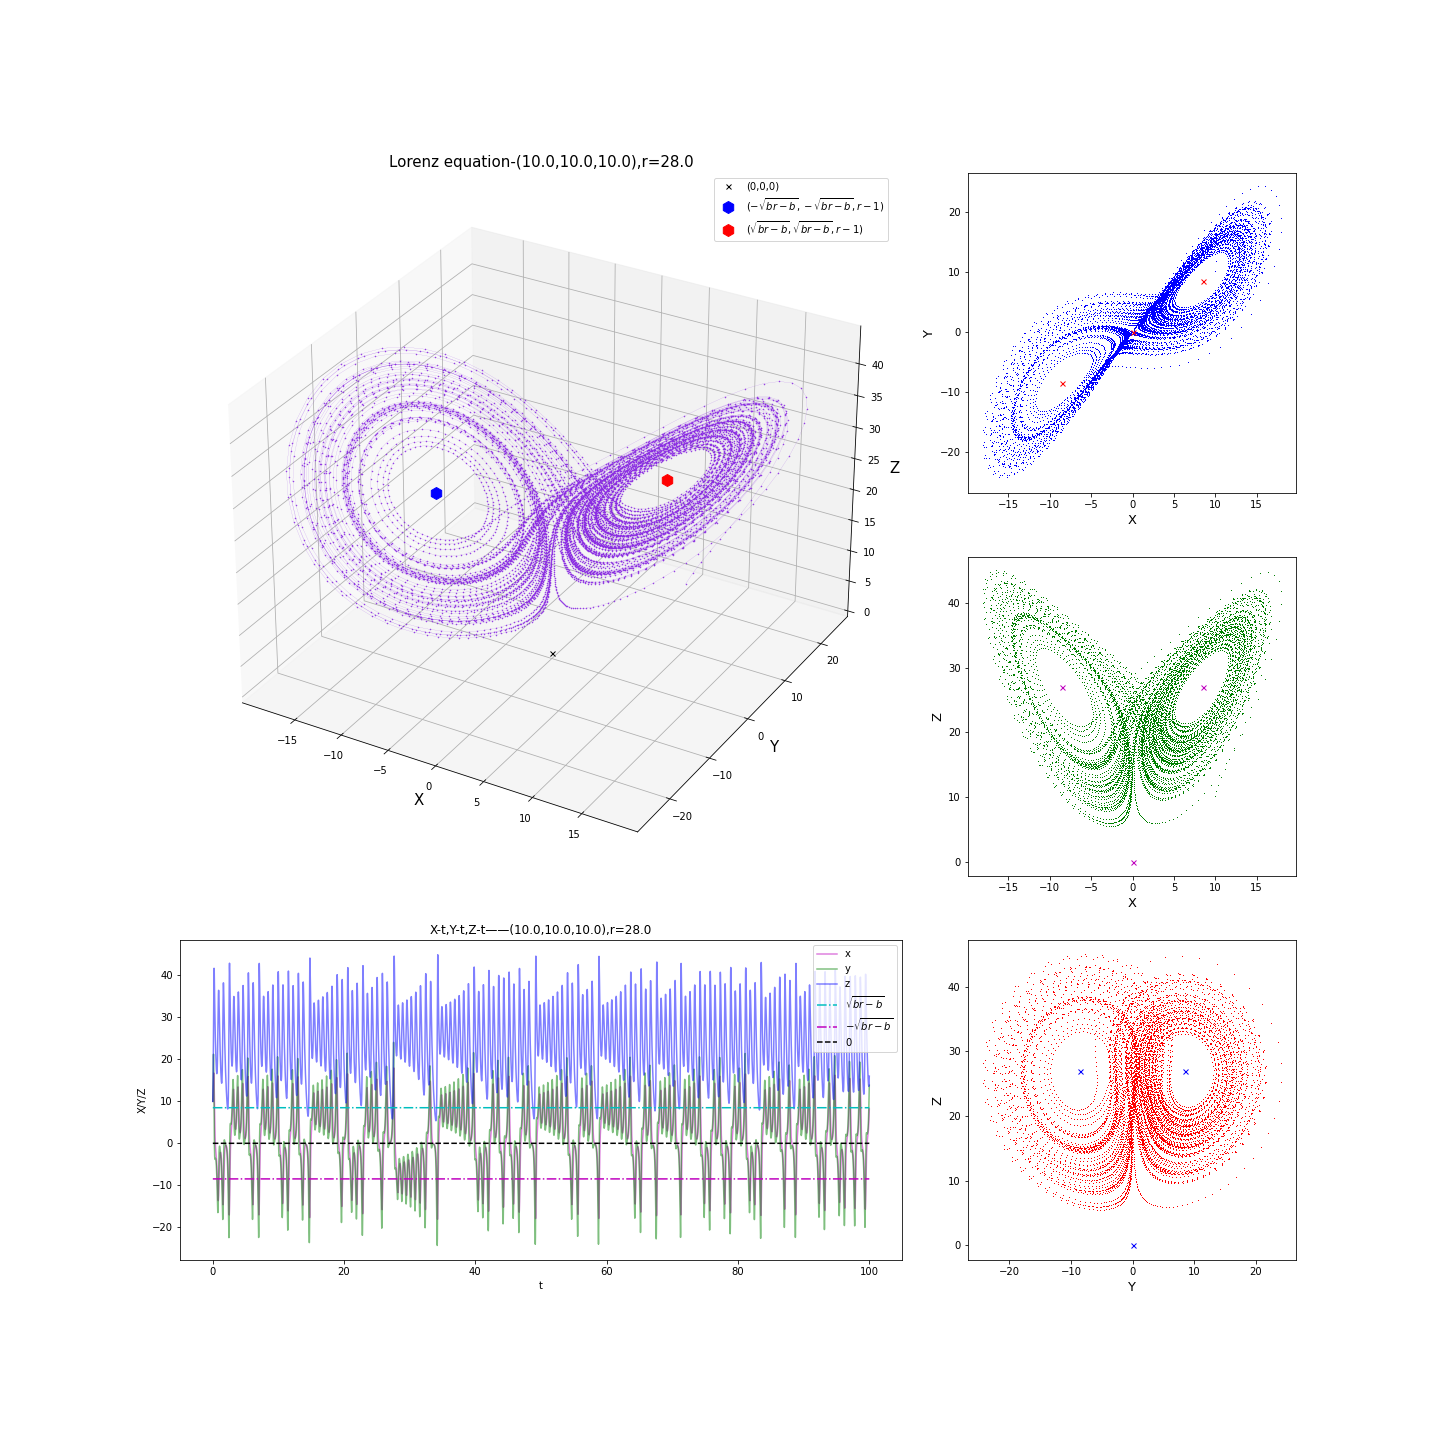

## > *`三点动态演化图`*

In [118]:

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation
from scipy.integrate import odeint 
def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
#初值点
x0=np.array([10,10,10])
x1=np.array([11,10,10])
x2=np.array([10,9,10])
print(x0,x1,x2)
t=np.linspace(0,10,1000)
s=10
r=119
b=8/3
xt0=odeint(lorenz,x0,t,args=(s,r,b))
xt0=xt0.T

xt1=odeint(lorenz,x1,t,args=(s,r,b))
xt1=xt1.T

xt2=odeint(lorenz,x2,t,args=(s,r,b))
xt2=xt2.T

#plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
#ax1 = plt.gca(projection='3d')

def HHH(h):
    global xt1,xt2,ct1
    #plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
    fig = plt.figure(figsize=(10,10))
    ax=plt.axes(projection='3d')
    
    plt.plot(xt0[0][:h],xt0[1][:h],xt0[2][:h],c="blue",linewidth=0.8)
    plt.plot(xt0[0][h-1],xt0[1][h-1],xt0[2][h-1],marker="o",c="r",markersize=4)
    
    plt.plot(xt1[0][:h],xt1[1][:h],xt1[2][:h],c="g",linewidth=0.8)
    plt.plot(xt1[0][h-1],xt1[1][h-1],xt1[2][h-1],marker="o",c="b",markersize=4)
    
    plt.plot(xt2[0][:h],xt2[1][:h],xt2[2][:h],c="r",linewidth=0.8)
    plt.plot(xt2[0][h-1],xt2[1][h-1],xt2[2][h-1],marker="o",c="yellow",markersize=4)
    
    plt.title(f"Dynamic Evolution——t in {h}",size=15)
    ax.set_ylabel('Y',size=15)
    ax.set_xlabel('X',size=15)
    ax.set_zlabel('Z',size=15)
    plt.show()
    #plt.cla()
    
play = widgets.Play(
    value=0,
    min=0,
    max=1000,
    #interval=100,
    step=1,
    description="Press play",
    disabled=False
)
widgets.interactive(HHH,h=play)

#animation.save('test_animation.gif',writer='imagemagick')

[10 10 10] [11 10 10] [10  9 10]


interactive(children=(Play(value=0, description='Press play', max=1000), Output()), _dom_classes=('widget-inte…

---------
--------
# 肆 · 最大李雅普诺夫指数随r的变化

## > *`李雅普诺夫指数`*
>李雅普诺夫指数刻画系统相空间任意一条微扰的轨道以何种方式偏离原轨道。我们任意选择两条靠得很近的轨道，它们的初始状态分别为：$x_0$ 和 $x_0+\delta x_0$。迭代$n$次之后，系统状态分别为 $x_n$ 和 $x_n+\delta x_n$。定义李雅普诺夫指数 $\lambda$ 满足如下等式：$$|\delta x_n|=e^{\lambda n}|\delta x_0|$$
两边取自然对数即得 $\lambda$ ：$$\lambda=\frac 1 n ln\frac{|\delta x_n|}{|\delta x_0|} $$
据其含义，描述劳伦兹吸引子需要 $\lambda_1,\lambda_2,\lambda_3$ 三个指数，且和为$$ \lambda_1+\lambda_2+\lambda_3=-(\delta+1+b)$$


# 
<font color=red size=15 face=yahei>待修改：</font>

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets

def lorenz(x, t, s, r, b):
    return np.array([s * (x[1] - x[0]), r * x[0] - x[1] - x[0] * x[2], x[0] * x[1] - b * x[2]])


def main30(x, y, z, t, r):
    x0 = np.array([x, y, z])
    x1 = np.array([x*(1+0.0001), y, z])
    x2 = np.array([x, y*(1+0.0001), z])
    x3 = np.array([x, y, z*(1+0.0001)])
    x4 = np.array([x*(1+0.0001), y*(1+0.0001), z*(1+0.0001)])
    
    t = np.linspace(0,t,1000)
    s = 10
    b = 8/3
    xt = odeint(lorenz, x0, t, args=(s, r, b))
    xt1=odeint(lorenz, x1, t, args=(s, r, b))
    xt2=odeint(lorenz, x2, t, args=(s, r, b))
    xt3=odeint(lorenz, x3, t, args=(s, r, b))
    xt4=odeint(lorenz, x4, t, args=(s, r, b))
    xt1=xt1-xt
    xt2=xt2-xt
    xt3=xt3-xt
    x0=x0*0.0001
    xt = xt.T
    #print(xt)
    #f, (L1, L2, L3) = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(10, 15))
    h = len(xt[0])
    qq1=xt1[0][-1]/x0[0]
    qq2=xt2[1][-1]/x0[1]
    qq3=xt3[2][-1]/x0[2]
    qq4=(xt4[0][-1]-x0[0])**2+(xt4[1][-1]-x0[1])**2+(xt4[2][-1]-x0[2])**2
    #print(xt[0][-1],xt[1][-1],xt[2][-1])
    qq1=np.log(np.abs(qq1))/h
    qq2=np.log(np.abs(qq2))/h
    qq3=np.log(np.abs(qq3))/h
    qq4=np.log(np.sqrt(qq4))/h
    lam=[qq1,qq2,qq3,qq4]
    print(lam)
    return lam

def main3(x, y, z, t, Rmax):
    rr = np.linspace(0, Rmax, 100)
    R=np.array([0,0,0,0])
    for r in rr:
        #array合并
        R=np.vstack((R,main30(x, y, z, t, r)))
    R=R.T
    #print(R[0])
    #print(R)
    rr=np.hstack((0,rr))
    #print(rr)
    plt.figure(figsize=(15,10))
    plt.plot(rr[1::],R[0][1::],c='b')
    plt.plot(rr[1::],R[1][1::],c='r')
    plt.plot(rr[1::],R[2][1::],c='g')
    plt.plot(rr[1::],R[3][1::],c='m')
widgets.interact_manual(
        main3,
        t=widgets.FloatSlider(min=0, max=500, step=0.01, value=100, readout_format='.2f', description='t:'),
        x=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f', description='X_0'),
        y=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f', description='Y_0:'),
        z=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f', description='Z_0;'),
        Rmax=widgets.FloatSlider(min=0, max=1000, step=0.001, value=30, readout_format='.3f', description='Rmax;')
        详细信息=Flase
        )


interactive(children=(FloatSlider(value=10.0, description='X_0', readout_format='.3f', step=0.001), FloatSlide…

<function __main__.main3(x, y, z, t, Rmax)>

---------
--------
# 伍 · odeint算法调节

---------
--------
# 陆 · 问题与错误

---------
--------
# 柒 · 致谢 

# 参考代码+失败尝试：（谨慎运行）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation
from scipy.integrate import odeint
import time
def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
x0=np.array([10,10,10])
t=np.linspace(0,100,10000)
s=10
r=28
b=8/3
xt=odeint(lorenz,x0,t,args=(s,r,b))
xt=xt.T
ax=plt.figure
#ax = plt.gca(projection='3d')
ax.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
for i in range(10000):
    ax.plot(xt[0][i],xt[1][i],xt[2][i],c="b")
    time.sleep(0.01)
    plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation
from scipy.integrate import odeint

def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
x0=np.array([10,10,10])
t=np.linspace(0,100,10000)
s=10
r=28
b=8/3
xt=odeint(lorenz,x0,t,args=(s,r,b))
xt=xt.T
plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
h=1000
plt.plot(xt[0][:h],xt[1][:h],xt[2][:h],c="b")
plt.plot(xt[0][h],xt[1][h],xt[2][h],"go",c="r",markersize=4)
plt.show()

C:\Users\husky\AppData\Local\Temp\ipykernel_34260\2708710255.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(xt[0][h],xt[1][h],xt[2][h],"go",c="r",markersize=4)


(-1.0, 1.0)

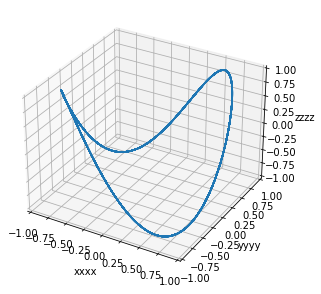

In [84]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection='3d')
x=np.linspace(0, 100, 1000)
x1=np.sin(x)
x2=np.cos(x)
x3=np.sin(2*x)
ax.plot(x1,x2,x3)
ax.set_xlabel('xxxx')
ax.set_ylabel('yyyy')
ax.set_zlabel('zzzz')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

(0.0, 30.0)

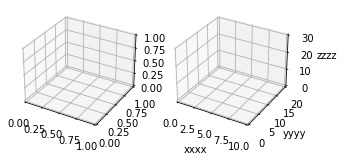

In [43]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(122,projection='3d')
ax2=fig.add_subplot(121,projection='3d')
ax.set_xlabel('xxxx')
ax.set_ylabel('yyyy')
ax.set_zlabel('zzzz')
ax.set_xlim(0,10)
ax.set_ylim(0,20)
ax.set_zlim(0,30)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
color1='#CD5C5C'
color2='#008B8B'
color4='#A9A9A9'

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation
from scipy.integrate import odeint 
def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
def HHH(h,xt0):
    plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
    plt.plot(xt0[0][:h],xt0[1][:h],xt0[2][:h],c="b")
    plt.plot(xt0[0][h-1],xt0[1][h-1],xt0[2][h-1],marker="o",c="r",markersize=4)
    plt.show()

def main3(x,y,z,r):
    x0=np.array([x,y,z])
    t=np.linspace(0,10,10000)
    s=10
    b=8/3
    xt=odeint(lorenz,x0,t,args=(s,r,b))
    xt=xt.T
    play = widgets.Play(
        value=0,
        min=0,
        max=10000,
        #interval=100,
        step=1,
        description="Press play",
        disabled=False
    )
    widgets.interactive(HHH,h=play,xt0=xt)

widgets.interact_manual(
    main3,
    x=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='X_0'),
    y=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='Y_0:'),
    z=widgets.FloatSlider(min=0, max=100, step=0.001, value=10, readout_format='.3f',description='Z_0;'),
    r=widgets.FloatSlider(min=0, max=1000, step=0.001, value=28, readout_format='.3f',description='R;')
)    

interactive(children=(FloatSlider(value=10.0, description='X_0', readout_format='.3f', step=0.001), FloatSlide…

<function __main__.main3(x, y, z, r)>

In [8]:
def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
x0=np.array([1000,1000,1000])
t=np.linspace(0,50,10000)
s=10
r=28
b=8/3
xt=odeint(lorenz,x0,t,args=(s,r,b))
xt=xt.T
#ax=plt.subplot(999,projection="3d")
#plt.axes(projection="3d")
ax = plt.gca(projection='3d')
plt.figure(figsize=(15,10))
plt.plot(xt[0],xt[1],xt[2])

C:\Users\husky\AppData\Local\Temp\ipykernel_34260\3961353525.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


In [6]:

import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import ipywidgets as ipd
import matplotlib.animation as ani

def Lorentz_equation(x,t,sigma,r,b):
    return np.array([sigma*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])


def main(r):
    X0=np.array([0,1,10])
    t=np.arange(0,80,0.01)
    sigma=10
    b=8/3
    #积分
    x_t = sci.odeint(Lorentz_equation,X0,t,args=(sigma,r,b))
    #odeint()变量第一个是微分方程函数，第二个是微分方程初值，第三个是微分的自变量。
    plt.figure(figsize=(20,10))
    ax = plt.gca(projection='3d')
    ax.plot(x_t[:,0],x_t[:,1],x_t[:,2])
    null = [-30]*len(x_t[:,0])  #在y=30处的面
    ax.plot(null,x_t[:,1], x_t[:,2],alpha=0.2)
    null = [30]*len(x_t[:,1])  #在y=30处的面
    ax.plot(x_t[:,0],null, x_t[:,2],alpha=0.2)
    null = [0]*len(x_t[:,2])  #在y=0处的面
    ax.plot(x_t[:,0],x_t[:,1], null,alpha=0.2)
    plt.show()
    
ipd.interact_manual(   #ipd.interact_manual是点击开始才开始的意思,ipd.interact是直接开始的意思
    main,
    r=ipd.FloatSlider(min=0, max=50, step=0.01, value=32, readout_format='.2f',description='r的值:'),
)



interactive(children=(FloatSlider(value=32.0, description='r的值:', max=50.0, step=0.01), Button(description='Ru…

<function __main__.main(r)>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation
from scipy.integrate import odeint 

def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])
x0=np.array([10,10,10])
t=np.linspace(0,10,10000)
s=10
r=28
b=8/3
xt=odeint(lorenz,x0,t,args=(s,r,b))
xt=xt.T
#plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
#plt.figure(figsize=(20,10))
#ax1 = plt.gca(projection='3d')
def HHH(h):
    global xt
    plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
    plt.scatter(xt[0][:h],xt[1][:h],xt[2][:h],c="b",marker='.')
    plt.scatter(xt[0][h-1],xt[1][h-1],xt[2][h-1],c="r")
    plt.show()
    plt.cla()
    
play = widgets.Play(
    value=0,
    min=0,
    max=10000,
    #interval=100,
    step=5,
    description="Press play",
    disabled=False
)
widgets.interactive(HHH,h=play)
#animation.save('test_animation.gif',writer='imagemagick')

interactive(children=(Play(value=0, description='Press play', max=10000, step=5), Output()), _dom_classes=('wi…

In [3]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import ipywidgets as ipd
import matplotlib.animation as ani

def Lorentz_equation(x,t,sigma,r,b):
    return np.array([sigma*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])

%matplotlib auto            
X0=np.array([0,1,10])
t=np.arange(0,80,0.01)
sigma=10
b=8/3
r=30
#积分
x_t = sci.odeint(Lorentz_equation,X0,t,args=(sigma,r,b))

n=1000
X=[]
Y=[]
Z=[]
plt.figure(figsize=(20,10))
ax1 = plt.gca(projection='3d')
ax1.set_xlim3d(0,max(x_t[:,0]+1))
ax1.set_ylim3d(0,max(x_t[:,1]+1))
ax1.set_zlim3d(0,max(x_t[:,2]+1))

for i in range(n):
    X.append(x_t[i,0])
    Y.append(x_t[i,1])
    Z.append(x_t[i,2])
    ax1.cla()                                     
    ax1.plot(X,Y,Z,"k",markersize=0.5)
    ax1.plot(X[-1],Y[-1],Z[-1],"go",markersize=4) 
    plt.pause(0.001)

Using matplotlib backend: QtAgg


C:\Users\husky\AppData\Local\Temp\ipykernel_34260\231112561.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = plt.gca(projection='3d')


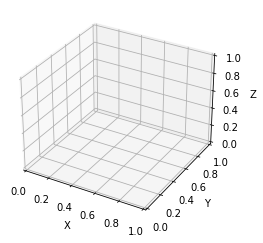

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

AttributeError: 'Axes3DSubplot' object has no attribute 'canvas'

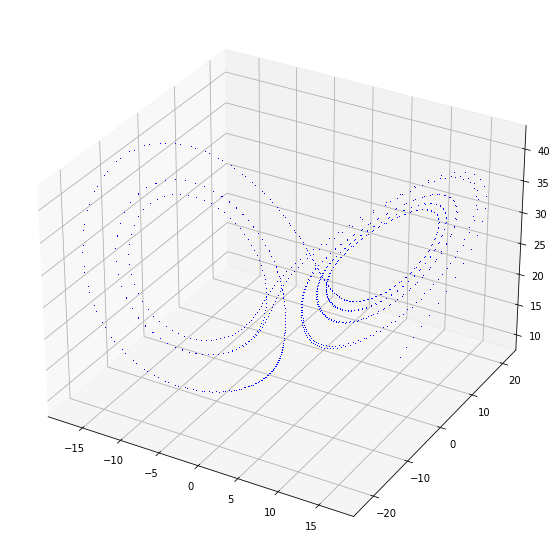

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.integrate import odeint
from matplotlib import animation

def lorenz(x,t,s,r,b):
    return np.array([s*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])

x0=np.array([10,10,10])
t=np.linspace(0,10,1000)
s=10
r=28
b=8/3
xt=odeint(lorenz,x0,t,args=(s,r,b))
xt=xt.T
plt.subplots(1,1,subplot_kw={'projection':"3d"},figsize=(15,10))
line,=plt.plot(xt[0],xt[1],xt[2],",",markersize=1000,linewidth=5,c="b")
def update(i):
    line.set_xdate(xt[0][i])
    line.set_ydate(xt[1][i])
    line.set_zdate(xt[2][i])
    return line,
ani=animation.FuncAnimation(ax,update,interval=100,repeat=False,blit=False)
plt.show()



In [30]:
# wkf
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import ipywidgets as ipd
import matplotlib.animation as ani

def Lorentz_equation(x,t,sigma,r,b):
    return np.array([sigma*(x[1]-x[0]),r*x[0]-x[1]-x[0]*x[2],x[0]*x[1]-b*x[2]])

%matplotlib auto    
#%matplotlib notebook
#%matplotlib inline
X0=np.array([0,1,10])
X1=np.array([0.2,1.1,10.3])
t=np.arange(0,80,0.01)
sigma=10
b=8/3
r=30
#积分
x_t = sci.odeint(Lorentz_equation,X0,t,args=(sigma,r,b))
x_t1 = sci.odeint(Lorentz_equation,X1,t,args=(sigma,r,b))

n=len(x_t[:,0])
X=[]
Y=[]
Z=[]
X1=[]
Y1=[]
Z1=[]
plt.figure(figsize=(20,10))
ax1 = plt.gca(projection='3d')
ax1.set_xlim3d(0,max(x_t[:,0]+1))
ax1.set_ylim3d(0,max(x_t[:,1]+1))
ax1.set_zlim3d(0,max(x_t[:,2]+1))

for i in range(n):#i是从0开始的
    X.append(x_t[i,0])
    Y.append(x_t[i,1])
    Z.append(x_t[i,2])
    X1.append(x_t[i,0])
    Y1.append(x_t[i,1])
    Z1.append(x_t[i,2])
    ax1.cla()                                     #清除画图数据
    ax1.set_xlim3d(min(x_t[:,0]-1),max(x_t[:,0]+1))
    ax1.set_ylim3d(min(x_t[:,1]-1),max(x_t[:,1]+1))
    ax1.set_zlim3d(min(x_t[:,2]-1),max(x_t[:,2]+1))
    ax1.plot(np.sqrt(b*(r-1)),np.sqrt(b*(r-1)),r-1,marker='.',markersize=10,c='r')
    ax1.plot(-np.sqrt(b*(r-1)),-np.sqrt(b*(r-1)),r-1,marker='.',markersize=10,c='r')
    ax1.plot(X,Y,Z,"k",markersize=0.5)
    ax1.plot(X1,Y1,Z1,"g",markersize=0.5)
    ax1.plot(X[-1],Y[-1],Z[-1],"go",'r',markersize=4) #数组的-1就是最前面的点
    ax1.plot(X1[-1],Y1[-1],Z1[-1],"go",'r',markersize=4) #数组的-1就是最前面的点
    plt.pause(0.0001)

Using matplotlib backend: <object object at 0x000001B9DF00F890>


C:\Users\husky\AppData\Local\Temp\ipykernel_29652\765819227.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = plt.gca(projection='3d')
Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    retu

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\An

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacO

  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 106, in _proj_transform_vec
    vecw = np.dot(M, vec)
  File "<__array_function__ internals>", line 5, in dot
ValueError: data type must provide an itemsize
Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\An

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site

  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\An

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 144, in proj_transform
    return _proj_transform_vec(vec, M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 106, in _proj_transform_vec
    vecw = np.dot(M, vec)
  File "<__array_function__ internals>", line 5, in dot
ValueError: data type must provide an itemsize
Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 144, in proj_transform
    return _proj_transform_vec(vec, M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 106, in _proj_transfor

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 144, in proj_transform
    return _proj_transform_vec(vec, M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 106, in _proj_transform_vec
    vecw = np.dot(M, vec)
  File "<__array_function__ internals>", line 5, in dot
ValueError: data type must p

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 144, in proj_transform
    return _proj_transform_vec(vec, M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 106, in _proj_transform_vec
    vecw = np.dot(M, vec)
  File "<__array_function__ internals>", line 5, in dot
ValueError: data type must provide an itemsize
Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 144, in proj_transform
    return _proj_transform_vec(vec, M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 106, in _proj_transfor

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 144, in proj_transform
    return _proj_

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\art3d.py", line 216, in draw
    xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 144, in proj_transform
    return _proj_transform_vec(vec, M)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py", line 106, in _proj_transform_vec
    vecw = np.dot(M, vec)
  File "<__array_function__ internals>", line 5, in dot
ValueError: data type must p

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\An

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    supe

  File "<__array_function__ internals>", line 5, in dot
ValueError: data type must provide an itemsize
Traceback (most recent call last):
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "D:\AnacONDa\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, rend

  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\figure.py", line 2810, in draw
    mimage._draw_list_compositing_images(
  File "D:\AnacONDa\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 473, in draw
    super().draw(renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "D:\AnacONDa\lib\site-packages\matplotlib\axes\_base.py", line 3082, in draw
    mimage._draw_list_compositing_images(
  File "D:\An

KeyboardInterrupt: 